In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise
from scipy.sparse import csr_matrix
import sklearn

### Get the Data

In [2]:
# Read movies data

movies = pd.read_csv('./data/ml-latest-small/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
movies.shape

(9742, 3)

In [4]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [5]:
# Read the ratings data

ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
# count the no. of unique users

ratings['userId'].nunique()

610

In [9]:
# count the unique no. of times a movie has been rated

ratings['movieId'].nunique()

9724

In [10]:
# Total no. of ratings received by all the movies

ratings['movieId'].max()

193609

In [11]:
# Count no. of ratings for each movie
count_ratings = ratings.groupby('movieId').count()
count_ratings.drop(columns=['userId', 'timestamp'], inplace=True)
count_ratings.columns = ['count_of_ratings']
count_ratings

,count_of_ratings
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


In [12]:
# throw away movies that have been rated by less than 100 users

more_than_100_ratings = count_ratings.loc[count_ratings['count_of_ratings'] >= 100]
more_than_100_ratings

,count_of_ratings
movieId,
1,215
2,110
6,102
10,132
32,177
...,...
48516,107
58559,149
60069,104


In [13]:
# def popularity_recommender(): # shows top 5 movies rated most by all users

In [14]:
# uses similar genres - movies_genres.csv - content-based 

In [15]:
# takes into account the average rating and the number of votes it has accumulated.

In [16]:
# Calculate the average rating for each movie in the dataset

mean_rating = ratings.groupby('movieId').mean()
mean_rating.drop(columns=['userId', 'timestamp'], inplace=True)
mean_rating.columns = ['mean_rating']
mean_rating

,mean_rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [17]:
ratings.set_index('userId')

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


In [18]:
userId = 1
watched_movies = ratings.loc[ratings['userId'] == userId]['movieId']
watched_movies

0         1
1         3
2         6
3        47
4        50
       ... 
227    3744
228    3793
229    3809
230    4006
231    5060
Name: movieId, Length: 232, dtype: int64

In [19]:
watched_movies = ratings.loc[ratings['userId'] == 1]
watched_movies

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [20]:
def get_watched_movies(userId):
    """
    It gets the userId and returns the list of movies rated by that particular user.
    (The user has given ratings means he/she has already watched it.)
    """
    watched_movies = ratings.loc[ratings['userId'] == userId]['movieId']
    return list(watched_movies)   

In [21]:
# get_watched_movies(1)

In [22]:
movies.set_index('movieId', inplace=True)
movies

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [23]:
movies = pd.concat([movies, count_ratings, mean_rating], axis=1)
movies

,title,genres,count_of_ratings,mean_rating
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,1.0,4.000000
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,1.0,3.500000
193585,Flint (2017),Drama,1.0,3.500000


In [24]:
# Recommend the top movies that a user has not seen yet

# (take top rated movies and filter it out from the movies that the user has already seen.)

top_rated = (movies.sort_values(by='count_of_ratings', ascending=False)).head(10)
top_rated.drop(columns=['count_of_ratings', 'mean_rating'], inplace=True) 
top_rated

,title,genres
movieId,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
110,Braveheart (1995),Action|Drama|War
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [25]:
# create a user-movie-matrix

user_rating = pd.pivot_table(ratings, index='userId', columns='movieId', values ='rating')
user_rating

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# convert ratings to a sparse user-item matrix

# like pivot_tablet but much more memory efficient 

user_item = csr_matrix((ratings['rating'], (ratings['userId'], ratings['movieId'])))
user_item

<611x193610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [27]:
user_item.shape

(611, 193610)

In [28]:
# user vector
user_item[1,:].todense()

matrix([[0., 4., 0., ..., 0., 0., 0.]])

In [29]:
# movie vector
user_item[:, 1].todense().shape

(611, 1)

### Similarity Matrix using 'NearestNeighbors' model

(611, 611)


<AxesSubplot:>

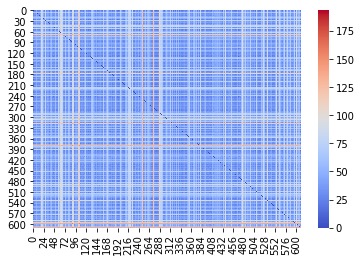

In [30]:
# this happens inside the NearestNeighbors model: user-user distance matrix
UU = pairwise.euclidean_distances(user_item)

## UU is a square matrix, how can we check that?
print(UU.shape)

# heatmap of the distances
sns.heatmap(UU, cmap='coolwarm')

In [34]:
# liked_items = get_watched_movies(userId)
liked_items = get_watched_movies(1)
len(liked_items)

232

In [42]:
most_popular_movies = top_rated[~top_rated.index.isin(liked_items)]
most_popular_movies

,title,genres
movieId,,
318,"Shawshank Redemption, The (1994)",Crime|Drama
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [31]:
def recommend_most_popular(userId, movie_item_avg, k=5):
    """
    return k most popular unseen movies for user
    """
    